<a href="https://colab.research.google.com/github/infiniteoverflow/Autoencoder/blob/master/Autoencoder_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

Autoencoding is the process by which we provide an image as an input to a Neural Network , compresses it using a series of layers and use a decoder to generate back the input image.

<img src="https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png" align="right">

We will use the MNIST Digits dataset to train a neural network to perform autoencoding

In [0]:
from torchvision import datasets,transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

In [0]:
dataset = datasets.MNIST('/tmp/data',train=True,transform=transform,download=True)
testdataset = datasets.MNIST('/tmp/data',train=False,transform=transform,download=True)

loader = torch.utils.data.DataLoader(dataset,batch_size=20,shuffle=True)
test_loader = torch.utils.data.DataLoader(testdataset,batch_size=20,shuffle=True)

In [46]:
dataiter = iter(loader)

images,labels = next(dataiter)

images.shape

torch.Size([20, 1, 28, 28])

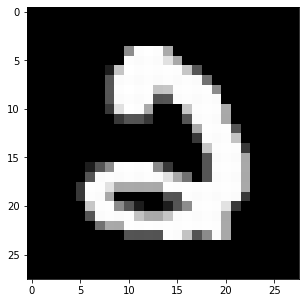

In [9]:

images = images.numpy()

img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## CNN Autoencoder

In [0]:
class CNNEncoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(1,16,3,padding=1)

    self.conv2 = nn.Conv2d(16,4,3,padding=1)

    self.pool = nn.MaxPool2d(2,2)

    self.tconv1 = nn.ConvTranspose2d(4,16,2,stride=2)

    self.tconv2 = nn.ConvTranspose2d(16,1,2,stride=2)

  def forward(self,x):
    
    x = self.pool(F.relu(self.conv1(x)))

    x = self.pool(F.relu(self.conv2(x)))

    x = F.relu(self.tconv1(x))

    x = torch.sigmoid(self.tconv2(x))

    return x

In [71]:
model = CNNEncoder()

if torch.cuda.is_available:
  print("GPU Available")
  model.cuda()

GPU Available


In [72]:
epochs = 20

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(),lr=0.001)

for epoch in range(epochs):

  train_loss = 0

  for image,label in loader:

    if torch.cuda.is_available:
      image , label = image.cuda(),label.cuda()

    optimizer.zero_grad()

    output = model(image)

    loss = criterion(output,image)

    loss.backward()

    optimizer.step()
    
    train_loss += loss.item()*image.size(0)
  
  train_loss = train_loss/len(loader)
  print('Epoch: {} \tTraining Loss: {:.6f}'.format(
      epoch, 
      train_loss
  ))

Epoch: 0 	Training Loss: 0.561269
Epoch: 1 	Training Loss: 0.344539
Epoch: 2 	Training Loss: 0.314955
Epoch: 3 	Training Loss: 0.294105
Epoch: 4 	Training Loss: 0.280059
Epoch: 5 	Training Loss: 0.271577
Epoch: 6 	Training Loss: 0.266054
Epoch: 7 	Training Loss: 0.261760
Epoch: 8 	Training Loss: 0.258584
Epoch: 9 	Training Loss: 0.256136
Epoch: 10 	Training Loss: 0.254345
Epoch: 11 	Training Loss: 0.252932
Epoch: 12 	Training Loss: 0.251691
Epoch: 13 	Training Loss: 0.250720
Epoch: 14 	Training Loss: 0.249815
Epoch: 15 	Training Loss: 0.248947
Epoch: 16 	Training Loss: 0.248078
Epoch: 17 	Training Loss: 0.247246
Epoch: 18 	Training Loss: 0.246511
Epoch: 19 	Training Loss: 0.245723


torch.Size([20, 784])


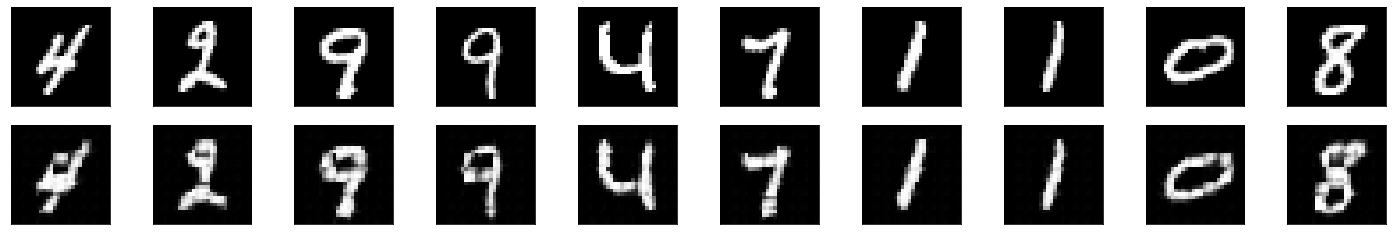

In [77]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

if torch.cuda.is_available:
  images , labels = images.cuda(),labels.cuda()

images_flatten = images.view(images.size(0),1,28,28)

print(image_flatten.shape)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
output = output.view(20, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().cpu().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)